# Import Packages

In [131]:
import pandas as pd
import numpy as np 
import csv
import re
import string

import nltk
from nltk import pos_tag, pos_tag_sents
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

import warnings
warnings.filterwarnings("ignore")

In [132]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/manikya_varshney/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /home/manikya_varshney/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/manikya_varshney/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/manikya_varshney/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [133]:
path = '/home/manikya_varshney/Documents/Python/Yale/final_h01-20200912-101538.csv'
data = pd.read_csv(path, low_memory=False)

In [134]:
data.shape

(6737, 3)

In [135]:
data

,id,user_id,extended_tweet_full_text
0,1.304786e+18,9.053900e+07,woke up to see if the justin bieber pandemic w...
1,1.304786e+18,8.497239e+17,@TeresaCCarter2 “Our intention is to make sure...
2,1.304786e+18,1.293830e+18,For More Information contact us. \nMail:- digi...
3,1.304786e+18,1.188902e+18,"UAE reports 1,007 new Covid-19 cases, highest ..."
4,1.304786e+18,2.273830e+08,Trump officials interfered with CDC reports on...
...,...,...,...
6732,1.304427e+18,6.874206e+07,Why did Twitter suddenly reinstate @clif_high?...
6733,1.304671e+18,8.323244e+17,Denna veckas COVID-19 veckorapport från Folkhä...
6734,1.304768e+18,4.446656e+09,Republicans Defend Trump After He Admitted Dow...
6735,1.301853e+18,3.914277e+08,The recession on the back of the Government's ...


In [136]:
data['extended_tweet_full_text']

0       woke up to see if the justin bieber pandemic w...
1       @TeresaCCarter2 “Our intention is to make sure...
2       For More Information contact us. \nMail:- digi...
3       UAE reports 1,007 new Covid-19 cases, highest ...
4       Trump officials interfered with CDC reports on...
                              ...                        
6732    Why did Twitter suddenly reinstate @clif_high?...
6733    Denna veckas COVID-19 veckorapport från Folkhä...
6734    Republicans Defend Trump After He Admitted Dow...
6735    The recession on the back of the Government's ...
6736    65 Catholics across the street only 7 wearing ...
Name: extended_tweet_full_text, Length: 6737, dtype: object

#####  1. Casing (Upper or lower case)
##### 2. Noise Removal (Removal of punctuation, white spaces, special characters, HTML tags)
##### 3. Tokenization (Tweets to tokens i.e. words seprated by spaces)
##### 4. Stopword Removal
##### 5. Text Normalization (Stemming and Lemmatization)

In [137]:
#Convert to lower case
data['extended_tweet_full_text'] = data['extended_tweet_full_text'].str.lower()

In [138]:
#Remove URLs
data['extended_tweet_full_text'] = data['extended_tweet_full_text'].str.replace(r"http\S+ | www\S+ | https\S+ | \S+\.com\S+", "")

In [139]:
#Remove user @
data['extended_tweet_full_text'] = data['extended_tweet_full_text'].str.replace(r'\@\w+ ', "")

In [140]:
data['extended_tweet_full_text'][2]

'for more information contact us. \nmail:- digitalabsolute8@gmail.com\n\nfollow on 📷instagram\n@digit_alabsolut\n#gym 🏋🚴💪 #gymlife #gymnastics #gymaddicated #covidー19 #gymjordan #gymnastalliance #gymbunny #gymsetup #gymgay #rajkot #startups #startupindia #startuplife #business https://t.co/1ydxp3al0d'

In [141]:
#Remove punctuations
data['extended_tweet_full_text'] = data['extended_tweet_full_text'].str.translate(str.maketrans("", "", string.punctuation))

In [142]:
data['extended_tweet_full_text'][2]

'for more information contact us \nmail digitalabsolute8gmailcom\n\nfollow on 📷instagram\ndigitalabsolut\ngym 🏋🚴💪 gymlife gymnastics gymaddicated covidー19 gymjordan gymnastalliance gymbunny gymsetup gymgay rajkot startups startupindia startuplife business httpstco1ydxp3al0d'

In [143]:
#More Cleaning
data['extended_tweet_full_text']=data['extended_tweet_full_text'].astype(str).str.replace('/[^a-zA-Z0-9 ]/g', '').str.replace('\n','').str.strip('“').str.lstrip(' ').str.rstrip(' ')

In [144]:
#Tokenizing
data.extended_tweet_full_text = data.extended_tweet_full_text.astype(str)
data['tokenized_extended_tweet_full_text'] = data.apply(lambda row: nltk.word_tokenize(row.extended_tweet_full_text), axis=1)

# remove stopwords
data['filtered_extended_tweet_full_text'] = data['tokenized_extended_tweet_full_text'].apply(lambda x: [word for word in x if word not in stop_words])

In [145]:
data

,id,user_id,extended_tweet_full_text,tokenized_extended_tweet_full_text,filtered_extended_tweet_full_text
0,1.304786e+18,9.053900e+07,woke up to see if the justin bieber pandemic w...,"[woke, up, to, see, if, the, justin, bieber, p...","[woke, see, justin, bieber, pandemic, going, b..."
1,1.304786e+18,8.497239e+17,our intention is to make sure that evidence sc...,"[our, intention, is, to, make, sure, that, evi...","[intention, make, sure, evidence, sciencebased..."
2,1.304786e+18,1.293830e+18,for more information contact us mail digitalab...,"[for, more, information, contact, us, mail, di...","[information, contact, us, mail, digitalabsolu..."
3,1.304786e+18,1.188902e+18,uae reports 1007 new covid19 cases highest sin...,"[uae, reports, 1007, new, covid19, cases, high...","[uae, reports, 1007, new, covid19, cases, high..."
4,1.304786e+18,2.273830e+08,trump officials interfered with cdc reports on...,"[trump, officials, interfered, with, cdc, repo...","[trump, officials, interfered, cdc, reports, c..."
...,...,...,...,...,...
6732,1.304427e+18,6.874206e+07,why did twitter suddenly reinstate clifhighcou...,"[why, did, twitter, suddenly, reinstate, clifh...","[twitter, suddenly, reinstate, clifhighcould, ..."
6733,1.304671e+18,8.323244e+17,denna veckas covid19 veckorapport från folkhäl...,"[denna, veckas, covid19, veckorapport, från, f...","[denna, veckas, covid19, veckorapport, från, f..."
6734,1.304768e+18,4.446656e+09,republicans defend trump after he admitted dow...,"[republicans, defend, trump, after, he, admitt...","[republicans, defend, trump, admitted, downpla..."
6735,1.301853e+18,3.914277e+08,the recession on the back of the governments h...,"[the, recession, on, the, back, of, the, gover...","[recession, back, governments, handling, covid..."


In [146]:
#Stemming
ps = PorterStemmer()
data['stemmed_extended_tweet_full_text'] = data['filtered_extended_tweet_full_text'].apply(lambda x: [ps.stem(y) for y in x])

In [147]:
data

,id,user_id,extended_tweet_full_text,tokenized_extended_tweet_full_text,filtered_extended_tweet_full_text,stemmed_extended_tweet_full_text
0,1.304786e+18,9.053900e+07,woke up to see if the justin bieber pandemic w...,"[woke, up, to, see, if, the, justin, bieber, p...","[woke, see, justin, bieber, pandemic, going, b...","[woke, see, justin, bieber, pandem, go, back, ..."
1,1.304786e+18,8.497239e+17,our intention is to make sure that evidence sc...,"[our, intention, is, to, make, sure, that, evi...","[intention, make, sure, evidence, sciencebased...","[intent, make, sure, evid, sciencebas, data, d..."
2,1.304786e+18,1.293830e+18,for more information contact us mail digitalab...,"[for, more, information, contact, us, mail, di...","[information, contact, us, mail, digitalabsolu...","[inform, contact, us, mail, digitalabsolute8gm..."
3,1.304786e+18,1.188902e+18,uae reports 1007 new covid19 cases highest sin...,"[uae, reports, 1007, new, covid19, cases, high...","[uae, reports, 1007, new, covid19, cases, high...","[uae, report, 1007, new, covid19, case, highes..."
4,1.304786e+18,2.273830e+08,trump officials interfered with cdc reports on...,"[trump, officials, interfered, with, cdc, repo...","[trump, officials, interfered, cdc, reports, c...","[trump, offici, interf, cdc, report, covid19, ..."
...,...,...,...,...,...,...
6732,1.304427e+18,6.874206e+07,why did twitter suddenly reinstate clifhighcou...,"[why, did, twitter, suddenly, reinstate, clifh...","[twitter, suddenly, reinstate, clifhighcould, ...","[twitter, suddenli, reinstat, clifhighcould, s..."
6733,1.304671e+18,8.323244e+17,denna veckas covid19 veckorapport från folkhäl...,"[denna, veckas, covid19, veckorapport, från, f...","[denna, veckas, covid19, veckorapport, från, f...","[denna, vecka, covid19, veckorapport, från, fo..."
6734,1.304768e+18,4.446656e+09,republicans defend trump after he admitted dow...,"[republicans, defend, trump, after, he, admitt...","[republicans, defend, trump, admitted, downpla...","[republican, defend, trump, admit, downplay, t..."
6735,1.301853e+18,3.914277e+08,the recession on the back of the governments h...,"[the, recession, on, the, back, of, the, gover...","[recession, back, governments, handling, covid...","[recess, back, govern, handl, covid, econom, h..."


In [148]:
#POSTags
data['POSTags'] = data['filtered_extended_tweet_full_text'].apply(lambda x: [pos_tag(word_tokenize(y)) for y in x])

In [149]:
data

,id,user_id,extended_tweet_full_text,tokenized_extended_tweet_full_text,filtered_extended_tweet_full_text,stemmed_extended_tweet_full_text,POSTags
0,1.304786e+18,9.053900e+07,woke up to see if the justin bieber pandemic w...,"[woke, up, to, see, if, the, justin, bieber, p...","[woke, see, justin, bieber, pandemic, going, b...","[woke, see, justin, bieber, pandem, go, back, ...","[[(woke, NN)], [(see, VB)], [(justin, NN)], [(..."
1,1.304786e+18,8.497239e+17,our intention is to make sure that evidence sc...,"[our, intention, is, to, make, sure, that, evi...","[intention, make, sure, evidence, sciencebased...","[intent, make, sure, evid, sciencebas, data, d...","[[(intention, NN)], [(make, VB)], [(sure, NN)]..."
2,1.304786e+18,1.293830e+18,for more information contact us mail digitalab...,"[for, more, information, contact, us, mail, di...","[information, contact, us, mail, digitalabsolu...","[inform, contact, us, mail, digitalabsolute8gm...","[[(information, NN)], [(contact, NN)], [(us, P..."
3,1.304786e+18,1.188902e+18,uae reports 1007 new covid19 cases highest sin...,"[uae, reports, 1007, new, covid19, cases, high...","[uae, reports, 1007, new, covid19, cases, high...","[uae, report, 1007, new, covid19, case, highes...","[[(uae, NN)], [(reports, NNS)], [(1007, CD)], ..."
4,1.304786e+18,2.273830e+08,trump officials interfered with cdc reports on...,"[trump, officials, interfered, with, cdc, repo...","[trump, officials, interfered, cdc, reports, c...","[trump, offici, interf, cdc, report, covid19, ...","[[(trump, NN)], [(officials, NNS)], [(interfer..."
...,...,...,...,...,...,...,...
6732,1.304427e+18,6.874206e+07,why did twitter suddenly reinstate clifhighcou...,"[why, did, twitter, suddenly, reinstate, clifh...","[twitter, suddenly, reinstate, clifhighcould, ...","[twitter, suddenli, reinstat, clifhighcould, s...","[[(twitter, NN)], [(suddenly, RB)], [(reinstat..."
6733,1.304671e+18,8.323244e+17,denna veckas covid19 veckorapport från folkhäl...,"[denna, veckas, covid19, veckorapport, från, f...","[denna, veckas, covid19, veckorapport, från, f...","[denna, vecka, covid19, veckorapport, från, fo...","[[(denna, NN)], [(veckas, NN)], [(covid19, NN)..."
6734,1.304768e+18,4.446656e+09,republicans defend trump after he admitted dow...,"[republicans, defend, trump, after, he, admitt...","[republicans, defend, trump, admitted, downpla...","[republican, defend, trump, admit, downplay, t...","[[(republicans, NNS)], [(defend, NN)], [(trump..."
6735,1.301853e+18,3.914277e+08,the recession on the back of the governments h...,"[the, recession, on, the, back, of, the, gover...","[recession, back, governments, handling, covid...","[recess, back, govern, handl, covid, econom, h...","[[(recession, NN)], [(back, RB)], [(government..."


In [150]:
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

In [153]:
#Lemmatizing
lemmatizer = WordNetLemmatizer()
data['lemmatized_extended_tweet_full_text'] = data['filtered_extended_tweet_full_text'].apply(lambda x: [lemmatizer.lemmatize(y, get_wordnet_pos(y)) for y in x])

In [154]:
data

,id,user_id,extended_tweet_full_text,tokenized_extended_tweet_full_text,filtered_extended_tweet_full_text,stemmed_extended_tweet_full_text,POSTags,lemmatized_extended_tweet_full_text
0,1.304786e+18,9.053900e+07,woke up to see if the justin bieber pandemic w...,"[woke, up, to, see, if, the, justin, bieber, p...","[woke, see, justin, bieber, pandemic, going, b...","[woke, see, justin, bieber, pandem, go, back, ...","[[(woke, NN)], [(see, VB)], [(justin, NN)], [(...","[woke, see, justin, bieber, pandemic, go, back..."
1,1.304786e+18,8.497239e+17,our intention is to make sure that evidence sc...,"[our, intention, is, to, make, sure, that, evi...","[intention, make, sure, evidence, sciencebased...","[intent, make, sure, evid, sciencebas, data, d...","[[(intention, NN)], [(make, VB)], [(sure, NN)]...","[intention, make, sure, evidence, sciencebased..."
2,1.304786e+18,1.293830e+18,for more information contact us mail digitalab...,"[for, more, information, contact, us, mail, di...","[information, contact, us, mail, digitalabsolu...","[inform, contact, us, mail, digitalabsolute8gm...","[[(information, NN)], [(contact, NN)], [(us, P...","[information, contact, u, mail, digitalabsolut..."
3,1.304786e+18,1.188902e+18,uae reports 1007 new covid19 cases highest sin...,"[uae, reports, 1007, new, covid19, cases, high...","[uae, reports, 1007, new, covid19, cases, high...","[uae, report, 1007, new, covid19, case, highes...","[[(uae, NN)], [(reports, NNS)], [(1007, CD)], ...","[uae, report, 1007, new, covid19, case, high, ..."
4,1.304786e+18,2.273830e+08,trump officials interfered with cdc reports on...,"[trump, officials, interfered, with, cdc, repo...","[trump, officials, interfered, cdc, reports, c...","[trump, offici, interf, cdc, report, covid19, ...","[[(trump, NN)], [(officials, NNS)], [(interfer...","[trump, official, interfere, cdc, report, covi..."
...,...,...,...,...,...,...,...,...
6732,1.304427e+18,6.874206e+07,why did twitter suddenly reinstate clifhighcou...,"[why, did, twitter, suddenly, reinstate, clifh...","[twitter, suddenly, reinstate, clifhighcould, ...","[twitter, suddenli, reinstat, clifhighcould, s...","[[(twitter, NN)], [(suddenly, RB)], [(reinstat...","[twitter, suddenly, reinstate, clifhighcould, ..."
6733,1.304671e+18,8.323244e+17,denna veckas covid19 veckorapport från folkhäl...,"[denna, veckas, covid19, veckorapport, från, f...","[denna, veckas, covid19, veckorapport, från, f...","[denna, vecka, covid19, veckorapport, från, fo...","[[(denna, NN)], [(veckas, NN)], [(covid19, NN)...","[denna, veckas, covid19, veckorapport, från, f..."
6734,1.304768e+18,4.446656e+09,republicans defend trump after he admitted dow...,"[republicans, defend, trump, after, he, admitt...","[republicans, defend, trump, admitted, downpla...","[republican, defend, trump, admit, downplay, t...","[[(republicans, NNS)], [(defend, NN)], [(trump...","[republican, defend, trump, admit, downplay, t..."
6735,1.301853e+18,3.914277e+08,the recession on the back of the governments h...,"[the, recession, on, the, back, of, the, gover...","[recession, back, governments, handling, covid...","[recess, back, govern, handl, covid, econom, h...","[[(recession, NN)], [(back, RB)], [(government...","[recession, back, government, handle, covid, e..."


In [155]:
#Joining the lemmetized tokens to form string
data['final'] = data['lemmatized_extended_tweet_full_text'].apply(lambda x: " ".join([word for word in x]))

In [157]:
data

,id,user_id,extended_tweet_full_text,tokenized_extended_tweet_full_text,filtered_extended_tweet_full_text,stemmed_extended_tweet_full_text,POSTags,lemmatized_extended_tweet_full_text,final
0,1.304786e+18,9.053900e+07,woke up to see if the justin bieber pandemic w...,"[woke, up, to, see, if, the, justin, bieber, p...","[woke, see, justin, bieber, pandemic, going, b...","[woke, see, justin, bieber, pandem, go, back, ...","[[(woke, NN)], [(see, VB)], [(justin, NN)], [(...","[woke, see, justin, bieber, pandemic, go, back...",woke see justin bieber pandemic go back sleep
1,1.304786e+18,8.497239e+17,our intention is to make sure that evidence sc...,"[our, intention, is, to, make, sure, that, evi...","[intention, make, sure, evidence, sciencebased...","[intent, make, sure, evid, sciencebas, data, d...","[[(intention, NN)], [(make, VB)], [(sure, NN)]...","[intention, make, sure, evidence, sciencebased...",intention make sure evidence sciencebased data...
2,1.304786e+18,1.293830e+18,for more information contact us mail digitalab...,"[for, more, information, contact, us, mail, di...","[information, contact, us, mail, digitalabsolu...","[inform, contact, us, mail, digitalabsolute8gm...","[[(information, NN)], [(contact, NN)], [(us, P...","[information, contact, u, mail, digitalabsolut...",information contact u mail digitalabsolute8gma...
3,1.304786e+18,1.188902e+18,uae reports 1007 new covid19 cases highest sin...,"[uae, reports, 1007, new, covid19, cases, high...","[uae, reports, 1007, new, covid19, cases, high...","[uae, report, 1007, new, covid19, case, highes...","[[(uae, NN)], [(reports, NNS)], [(1007, CD)], ...","[uae, report, 1007, new, covid19, case, high, ...",uae report 1007 new covid19 case high since ou...
4,1.304786e+18,2.273830e+08,trump officials interfered with cdc reports on...,"[trump, officials, interfered, with, cdc, repo...","[trump, officials, interfered, cdc, reports, c...","[trump, offici, interf, cdc, report, covid19, ...","[[(trump, NN)], [(officials, NNS)], [(interfer...","[trump, official, interfere, cdc, report, covi...",trump official interfere cdc report covid19 po...
...,...,...,...,...,...,...,...,...,...
6732,1.304427e+18,6.874206e+07,why did twitter suddenly reinstate clifhighcou...,"[why, did, twitter, suddenly, reinstate, clifh...","[twitter, suddenly, reinstate, clifhighcould, ...","[twitter, suddenli, reinstat, clifhighcould, s...","[[(twitter, NN)], [(suddenly, RB)], [(reinstat...","[twitter, suddenly, reinstate, clifhighcould, ...",twitter suddenly reinstate clifhighcould scien...
6733,1.304671e+18,8.323244e+17,denna veckas covid19 veckorapport från folkhäl...,"[denna, veckas, covid19, veckorapport, från, f...","[denna, veckas, covid19, veckorapport, från, f...","[denna, vecka, covid19, veckorapport, från, fo...","[[(denna, NN)], [(veckas, NN)], [(covid19, NN)...","[denna, veckas, covid19, veckorapport, från, f...",denna veckas covid19 veckorapport från folkhäl...
6734,1.304768e+18,4.446656e+09,republicans defend trump after he admitted dow...,"[republicans, defend, trump, after, he, admitt...","[republicans, defend, trump, admitted, downpla...","[republican, defend, trump, admit, downplay, t...","[[(republicans, NNS)], [(defend, NN)], [(trump...","[republican, defend, trump, admit, downplay, t...",republican defend trump admit downplay true th...
6735,1.301853e+18,3.914277e+08,the recession on the back of the governments h...,"[the, recession, on, the, back, of, the, gover...","[recession, back, governments, handling, covid...","[recess, back, govern, handl, covid, econom, h...","[[(recession, NN)], [(back, RB)], [(government...","[recession, back, government, handle, covid, e...",recession back government handle covid economi...


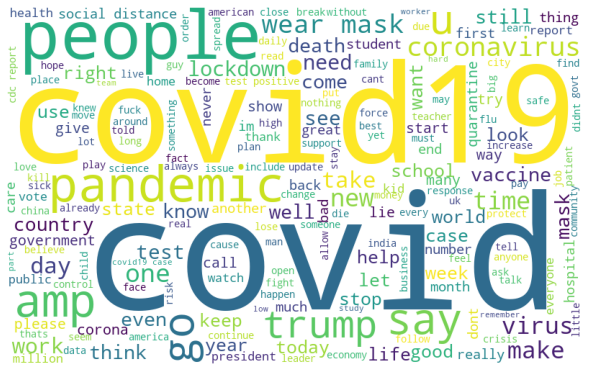

In [158]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
temp=' '.join(data['final'].tolist())
wordcloud = WordCloud(width = 800, height = 500, background_color ='white', min_font_size = 10).generate(temp)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.show()